In [1]:
import sys

sys.path.append("../")

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from mlresearch.utils import set_matplotlib_style

from algorec.populations import BasePopulation
from algorec.environments import ClosedEnvironment
from algorec.recourse import ActionableRecourse, NFeatureRecourse

set_matplotlib_style()

rng = np.random.default_rng(42)
df = pd.DataFrame(rng.random((100, 2)), columns=["a", "b"])
y = rng.integers(0, 2, 100)

lr = LogisticRegression().fit(df, y)

In [11]:
def visualize_decision_boundary(
    df, model, mesh_size=(100, 100), threshold=0.5, df_prev=None
):
    x, y = [
        np.array(np.linspace(df.min(0)[i] - 0.5, df.max(0)[i] + 0.5, mesh_size[i]))
        for i in range(2)
    ]
    mesh = np.stack(np.meshgrid(x, y), axis=2)

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Visualize model
    prob = (
        model.predict_proba(np.reshape(mesh, (mesh_size[0] * mesh_size[1], 2)))[:, -1]
        < threshold
    )
    prob = np.reshape(prob, mesh_size)
    ax.contourf(x, y, prob, alpha=0.5, cmap="Blues")

    if df_prev is not None:
        ax.plot(
            [df_prev.iloc[:, 0], df.iloc[:, 0]],
            [df_prev.iloc[:, 1], df.iloc[:, 1]],
            color="gray",
            alpha=0.5,
            zorder=1,
        )

    sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], ax=ax)
    return fig, ax


def visualize_agent_scores(df_list, model, threshold=0.5):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    for i, df in enumerate(df_list):
        x = np.ones(df.shape[0], dtype=int) * i
        prob = model.predict_proba(df)[:, -1]
        sns.scatterplot(x=x, y=prob, ax=ax, c="blue")

    return fig, ax

/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


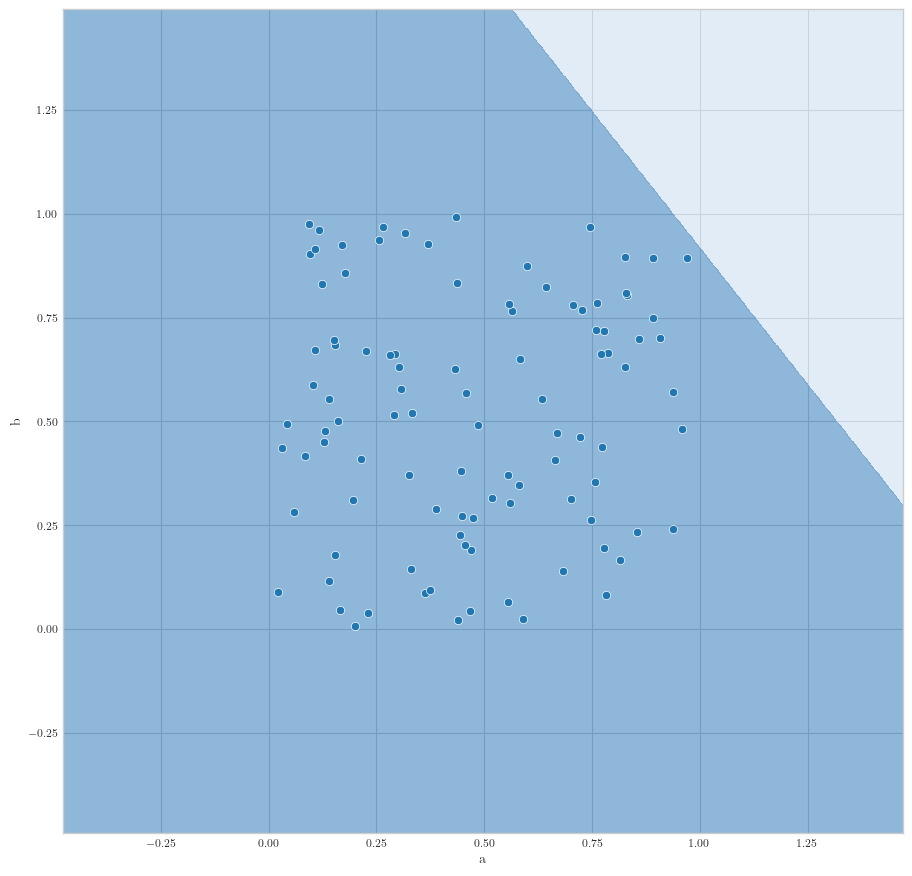

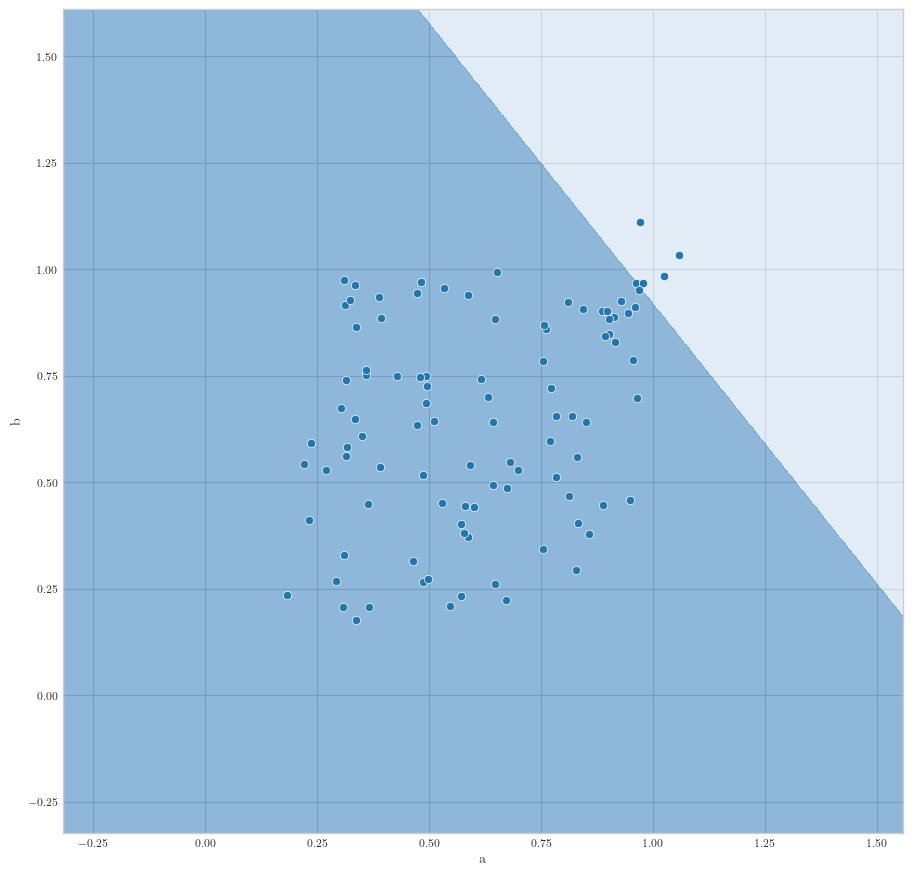

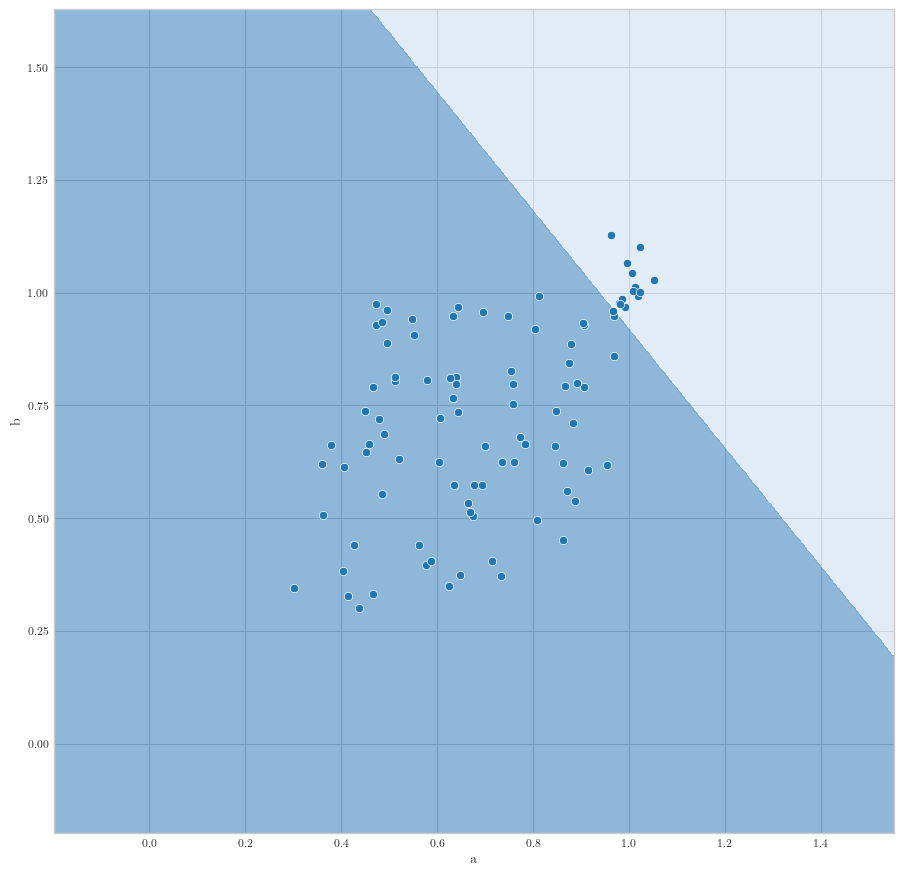

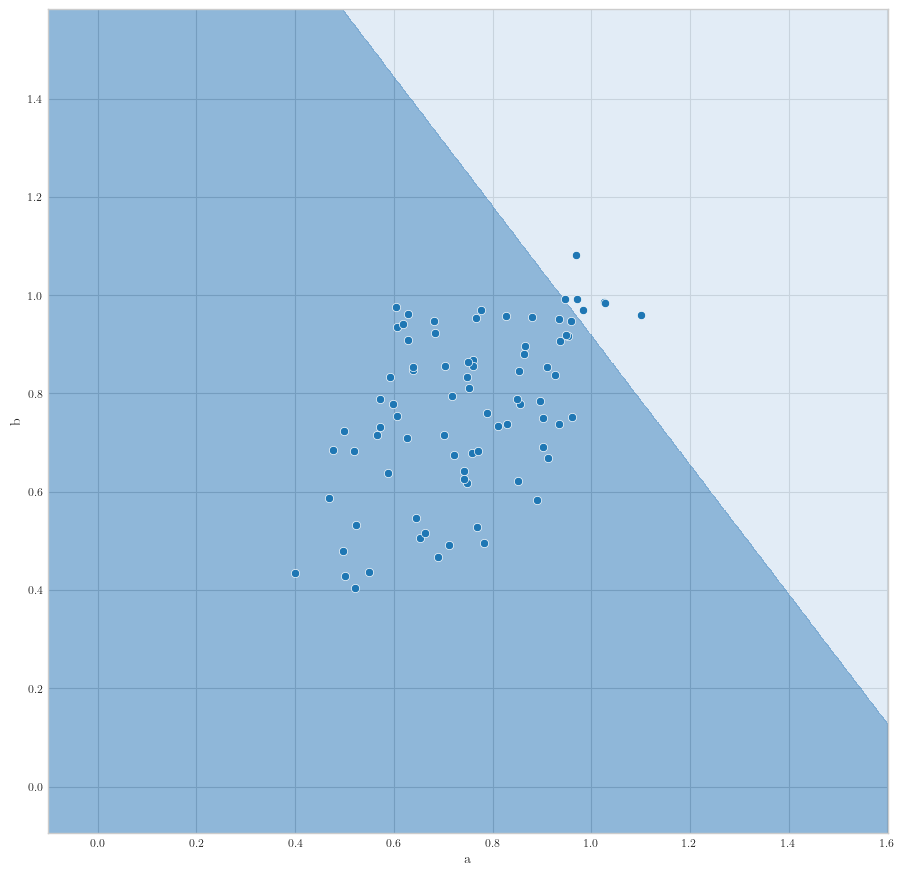

/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


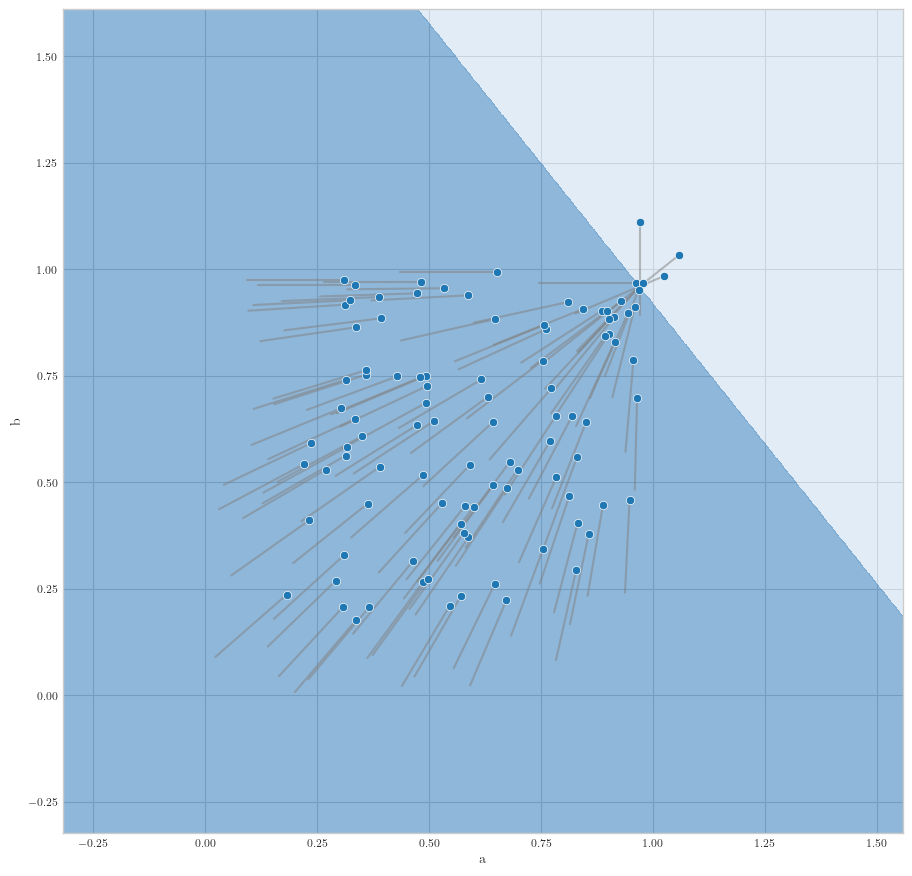

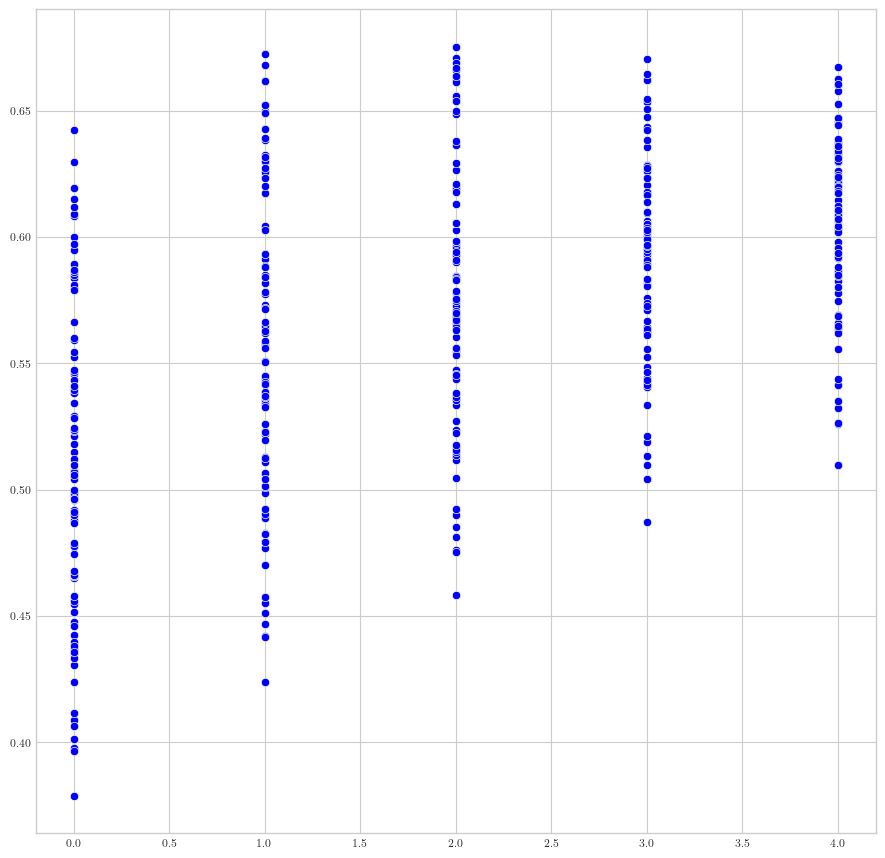

In [12]:
population = BasePopulation(data=df)
recourse = ActionableRecourse(model=lr, threshold=0.65)
environment = ClosedEnvironment(
    population=population, recourse=recourse, threshold=0.65, adaptation=0.3
)

for i in range(4):
    visualize_decision_boundary(
        environment.population_.data, lr, (1000, 1000), threshold=0.65
    )
    environment.update()

plt.show()

visualize_decision_boundary(
    environment.metadata_[1]["population"].data,
    lr,
    (1000, 1000),
    threshold=0.65,
    df_prev=environment.metadata_[0]["population"].data,
)
plt.show()

visualize_agent_scores(
    [metadata["population"].data for metadata in environment.metadata_.values()],
    model=lr,
    threshold=0.65,
)
plt.show()

/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


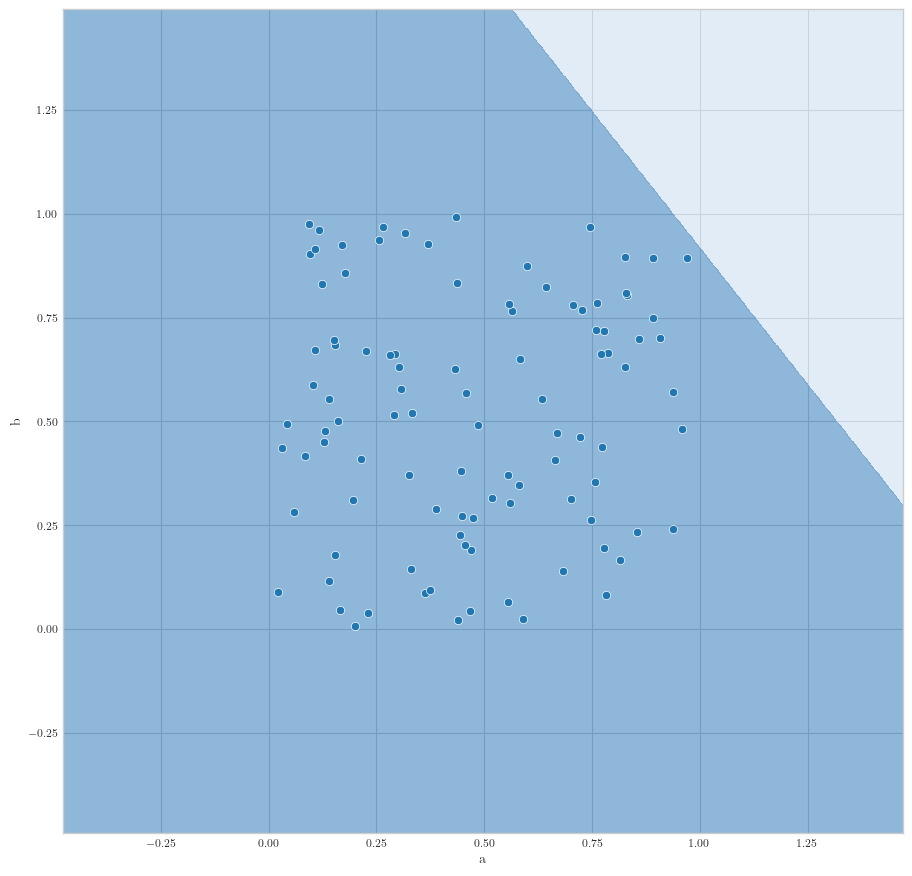

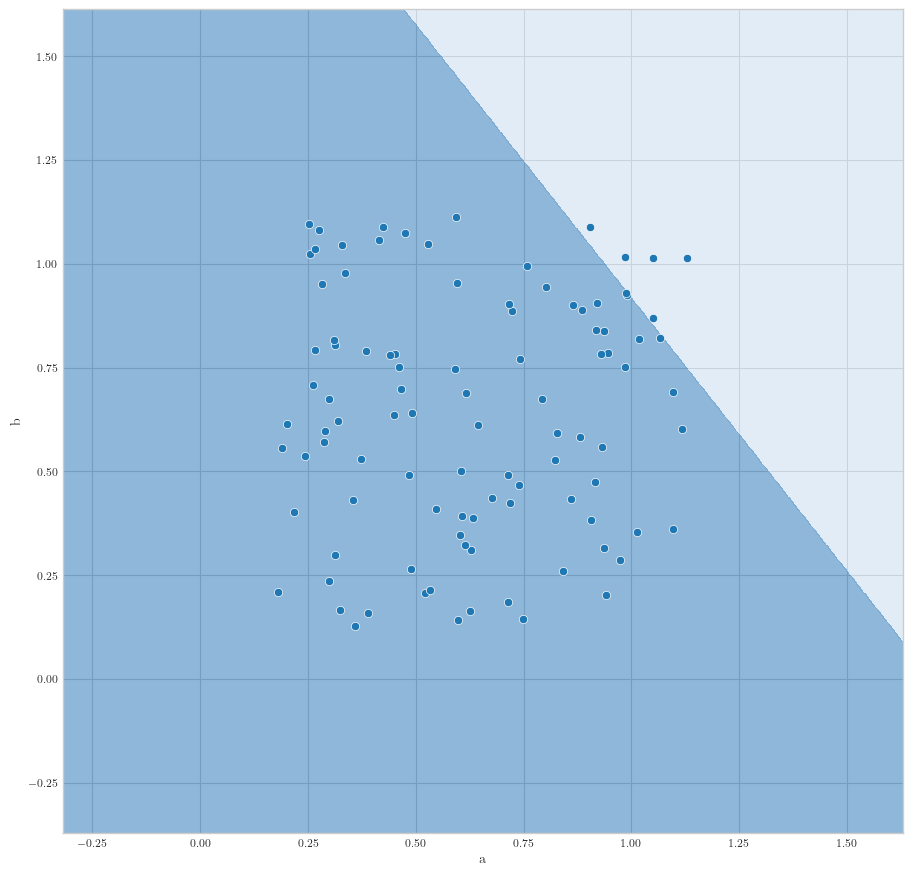

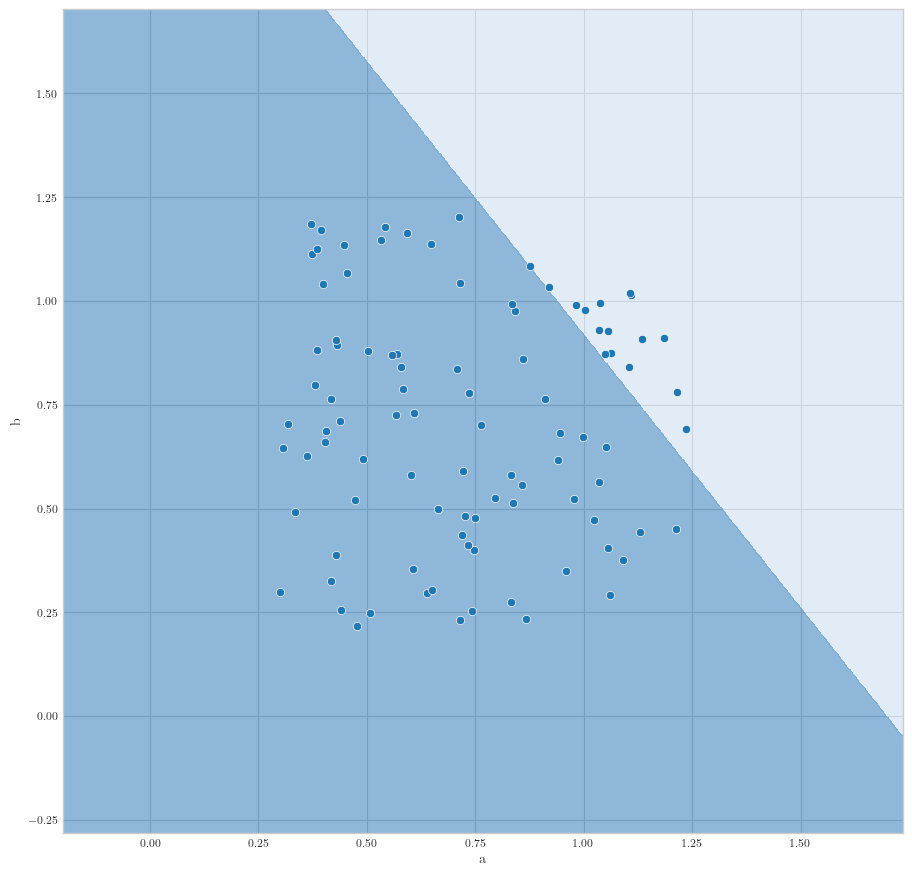

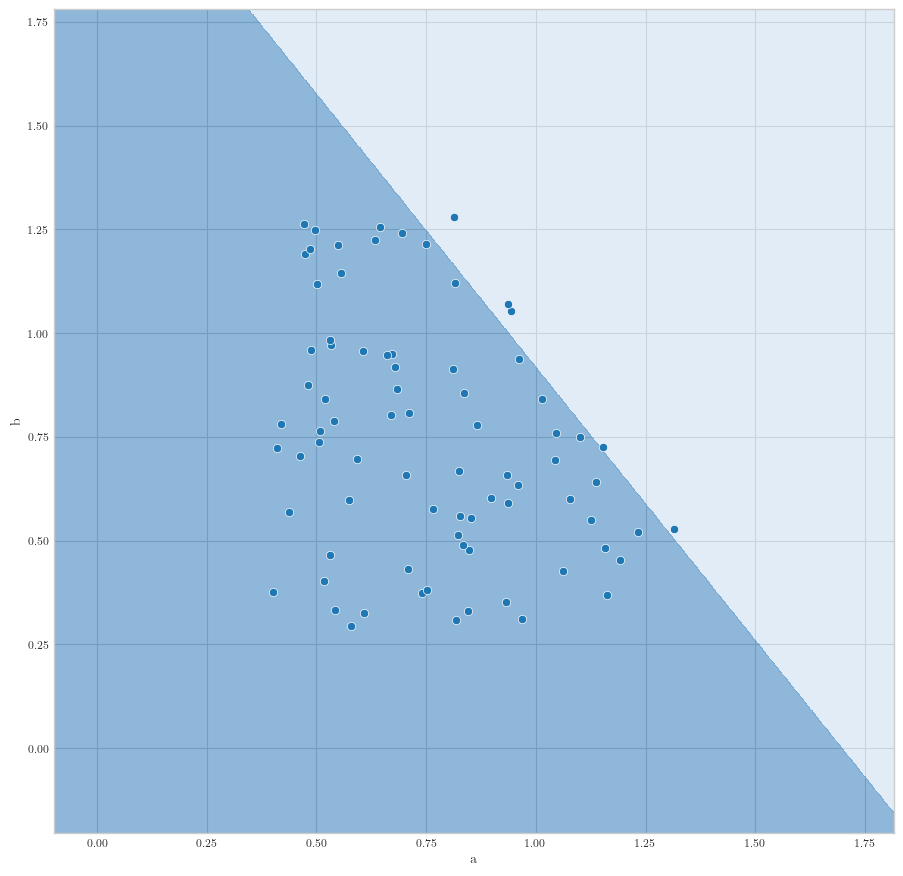

/home/joaofonseca/miniconda3/envs/recourse-game/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


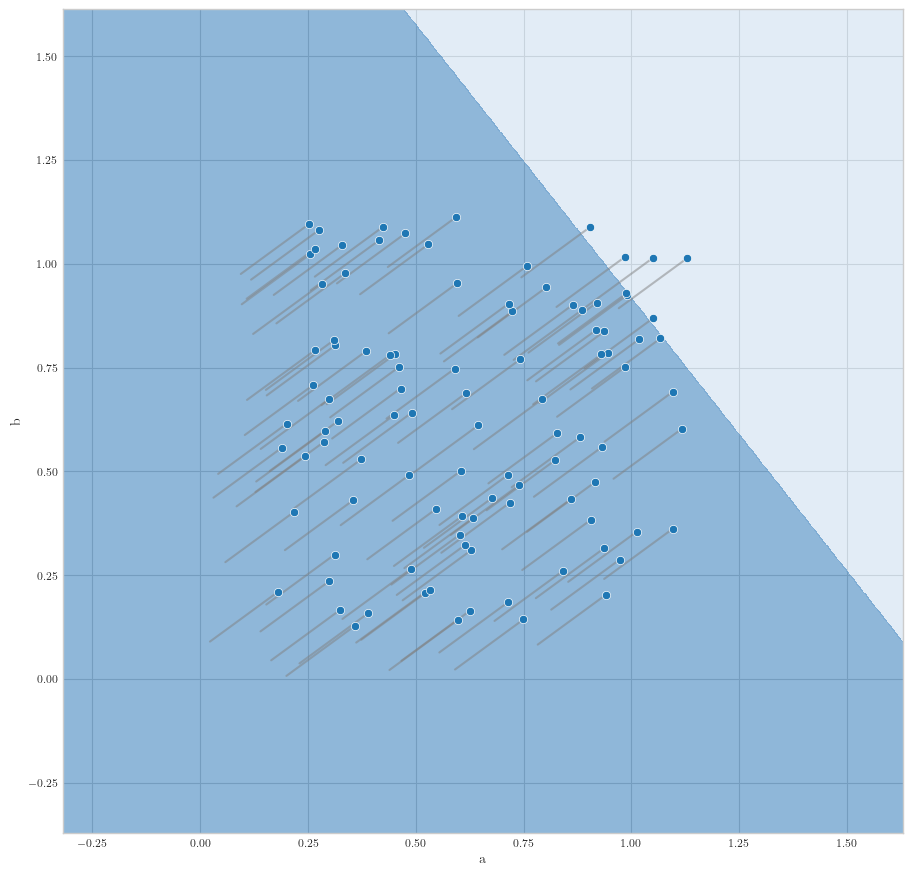

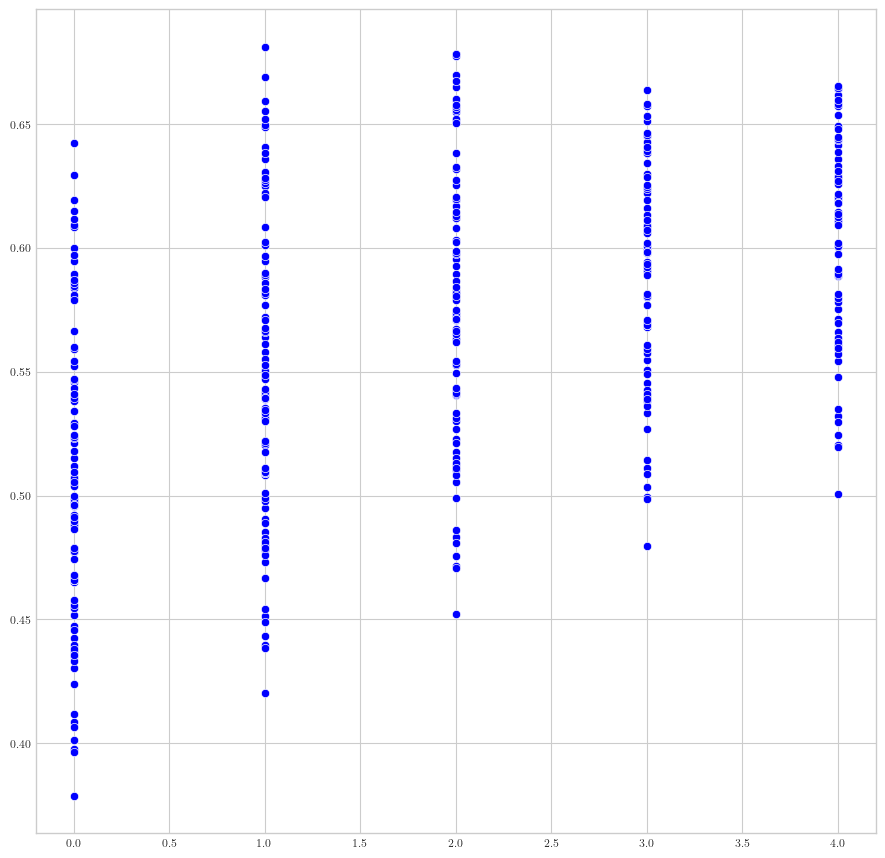

In [14]:
population = BasePopulation(data=df)
recourse = NFeatureRecourse(model=lr, threshold=0.65)
environment = ClosedEnvironment(
    population=population, recourse=recourse, threshold=0.65, adaptation=0.3
)

for i in range(4):
    visualize_decision_boundary(
        environment.population_.data, lr, (1000, 1000), threshold=0.65
    )
    environment.update()

plt.show()

visualize_decision_boundary(
    environment.metadata_[1]["population"].data,
    lr,
    (1000, 1000),
    threshold=0.65,
    df_prev=environment.metadata_[0]["population"].data,
)
plt.show()

visualize_agent_scores(
    [metadata["population"].data for metadata in environment.metadata_.values()],
    model=lr,
    threshold=0.65,
)
plt.show()